# imports:

In [1]:
import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from SampleLists.SampleFileFunctions import *

from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold, StratifiedKFold, KFold,train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, mutual_info_classif, f_classif

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'
figureFolder='%s/Presentations and Manuscripts/ISF_grant_figure/' %MyPath

stop
done1
stop
done
done


/usr/wisdom/python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1. get dfs: feature df (clean), target df
2. for each feature. calculate ROC_AUC scores
3. plot ROC_AUC histogram, color interesting bin(s) - USE NOAM FUNCTION!

4. predict isCardio using XGBoost and get probabilities.
5. plot ROC and PR graphs using Noam's function.


# Figures:

## calculate ROC_AUC scores for each feature seperately

### get dfs:

In [2]:
#new X: includes all TCR features, corrected for age and Gender
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined' %MyPath
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126

f1='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__withRels_AgeGenderGFRCorr.dat' %MyPath
X_corrected=pd.read_pickle(f1).loc[PNP530Cardio126,:]
gfr=[x for x in X_corrected.columns if 'GFR' in x]
print len(gfr)

targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
targetDF=targetDF.loc[X_corrected.index,:]

147


In [ ]:
# #featureDF:
# print 'getting TCRfeatureDF - without highly correlated columns...'
# featureFilePickle2='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126_filteredByPNP530Cardio126_allFeatures_\
# noCorrelated' %MyPath
# TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
# print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
# TCRfeatureDF2.iloc[:4,:4]

# f1='%s/TCR_real_data/CardioSamples/Predictions/LGBM_noamsCode/featureDFs/TCRfeatures_PNP530Cardio126_clean.dat' %MyPath
# TCRfeatureDF2.to_pickle(f1)

# print 'getting annot_features'
# f2='%s/TCR_real_data/annotationFeatures/PNP530_PNP530_annotationFeatures_noCorr0-99_nanFilled.xlsx' %MyPath
# PNP_annotFeat=pd.read_excel(f2)

# f3='%s/TCR_real_data/CardioSamples/annotationFeatures/Cardio126_Cardio126_annotationFeatures_noCorr0-99_nanFilled.xlsx'  %MyPath
# Cardio_annotFeat=pd.read_excel(f3)

# annotFeat=pd.concat([PNP_annotFeat,Cardio_annotFeat])
# print ('pnp annot shape',PNP_annotFeat.shape)
# print ('cardio annot shape',Cardio_annotFeat.shape)
# print ('total annot shape',annotFeat.shape)

# # phenotype df:
# PNPphenotypeFile='%s/TCR_real_data/NewPhenotypicData/newPhenotypesPNPAllInfo_withDummies.xlsx' %MyPath
# PNPphenotypeDF=pd.read_excel(PNPphenotypeFile)

# CardiophenotypeFile='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx' %MyPath
# CardiophenotypeDF=pd.read_excel(CardiophenotypeFile)

# PNP530Cardio126PhenotypeFile='%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/PNP530Cardio126_AllInfo_withDummies.xlsx' %MyPath
# combinedPhenotypeDF=pd.concat([PNPphenotypeDF,CardiophenotypeDF])
# combinedPhenotypeDF=combinedPhenotypeDF.set_index('BD')
# print len(combinedPhenotypeDF)
# print combinedPhenotypeDF.iloc[:4,:4]
# combinedPhenotypeDF.to_excel(PNP530Cardio126PhenotypeFile)

# septFeatures=['Smoking Status_Past', 'Smoking Status_Yes', 'Gender_Male', 'Age','BMI','eGFR by CKD-EPI',
#                        'HbA1C', 'AST', 'Hemoglobin','WBC','HDL','Total Cholesterol']
# with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
#     PNP530=pickle.load(fp)
# with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
#     Cardio126=pickle.load(fp)
# sampleList=PNP530+Cardio126
# sampleListName='PNP530Cardio126'

# combinedPhenotypeDF=combinedPhenotypeDF.loc[sampleList,septFeatures]

# #targetDF
# targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
# targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
# targetDF=targetDF.loc[TCRfeatureDF2.index,:]

# f2='%s/TCR_real_data/CardioSamples/Predictions/LGBM_noamsCode/targetDFs/isCardio_PNP530Cardio126.dat' %MyPath
# targetDF.to_pickle(f2)
# print targetDF.head()

# #TCRdf:
# print 'getting TCRdf...'
# percShared=10

# sharingFolder='%s/TCR_real_data/PNP530Cardio126Combined/sharingAnalysis' %MyPath
# TCRdfName='sharingMatrix_PNP530Cardio126_minNshared5_RA_onlyProductiveTrue__percShared%s_OLtrimmed_binary' %percShared
# TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
# print TCRdfFile
# TCRdf=pd.read_pickle(TCRdfFile)
# print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
# print TCRdf.iloc[:4,:4]



# #PCA:
# y=targetDF
# YName='isCardio'
# n_comp=10
# isSparse=True
# fig,ax=plt.subplots()
# TCRdf=editSampleNames(TCRdf)
# TCRdf = TCRdf.loc[[str(x) for x in TCRdf.index.tolist() if x in y.index], :]
# PCAdf,ax,p_ttest_PC1,p_ttest_PC2 = PCAfunc(TCRdf,n_comp,isSparse,ax,groupingByDF=y, groupbyName=YName)
# for c in ['BDindex', YName]:
#     try:
#         PCAdf = PCAdf.drop(c, axis=1)
#     except:
#         print 'PCAdf doesnt include %s column' % c
# print 'PCAdf shape is %s_%s' % (PCAdf.shape[0], PCAdf.shape[1])


# TCRfeatureDF3=pd.merge(TCRfeatureDF2,PCAdf,how='left',left_index=True,right_index=True)
# TCRfeatureDF3=pd.merge(TCRfeatureDF3,annotFeat,how='left',left_index=True,right_index=True)
# for feature in TCRfeatureDF3.columns:
#     if 'norm' in feature:
#             TCRfeatureDF3[feature]=TCRfeatureDF3[feature].fillna(TCRfeatureDF3[feature].median())
#     else:
#         TCRfeatureDF3[feature]=TCRfeatureDF3[feature].fillna(0)

# print 'featureDF shape:'
# print TCRfeatureDF3.shape
# print TCRfeatureDF3.index[:4]
# print TCRfeatureDF3.index[-4:]
# print 'phenotypeDF shape:'
# print combinedPhenotypeDF.shape
# print combinedPhenotypeDF.index[:4]
# print combinedPhenotypeDF.index[-4:]
# print 'targetDF:'
# print targetDF.shape
# print targetDF.index[:4]
# print targetDF.index[-4:]

### calculate AUC_ROC for all features:

In [3]:
feature_auc_df = pd.DataFrame(index=X_corrected.columns, columns=['AUC'])
real_class = targetDF.copy()
for n,feature in enumerate(feature_auc_df.index):
    print n,feature
    if 'norm' in feature:
        X_corrected[feature]=X_corrected[feature].fillna(X_corrected[feature].median())
    else:
        X_corrected[feature]=X_corrected[feature].fillna(0)
        
    fpr, tpr, thresholds = metrics.roc_curve(real_class, X_corrected[feature])
    roc_auc = metrics.auc(fpr, tpr)
    feature_auc_df.loc[feature, 'AUC'] = max(roc_auc, 1-roc_auc)

0 D01_J01-03_0
1 D01_J01-03_1
2 D01_J01-03_T
3 D01_J02-06_0
4 D02_J01-03_0
5 D02_J01-03_1
6 D02_J01-03_T
7 D02_J01-05_0
8 D02_J01-05_T
9 D02_J02-04_1
10 D02_J02-04_T
11 D02_J02-06_0
12 J01-03_0
13 J01-03_1
14 J01-03_T
15 J01-05_0
16 J02-06_0
17 V01-01_1
18 V01_J01_1
19 V01_J02_1
20 V03-01_0
21 V03-01_T
22 V03-02_0
23 V03-02_1
24 V03-02_T
25 V03_0
26 V03_1
27 V03_J01_0
28 V03_J01_T
29 V03_J02_0
30 V03_J02_T
31 V03_T
32 V04-01_T
33 V04-02_0
34 V04-02_1
35 V04-02_T
36 V04-03_0
37 V04-03_1
38 V04-03_T
39 V04_J02_0
40 V05-03_0
41 V05-03_1
42 V05-03_T
43 V05-04_0
44 V05-06_0
45 V05-06_1
46 V05-07_1
47 V05-07_T
48 V05-08_0
49 V06-01_0
50 V06-01_1
51 V06-01_T
52 V06-04_0
53 V06-06_0
54 V06-07_0
55 V06-07_1
56 V06-07_T
57 V06-08_0
58 V06-08_1
59 V06-08_T
60 V06-09_0
61 V06_0
62 V07-02_0
63 V07-03_1
64 V07-03_T
65 V07-04_T
66 V07-05_0
67 V07-05_T
68 V07-08_0
69 V07-08_T
70 V07-09_0
71 V07_J02_0
72 V09-01_0
73 V09_J01_1
74 V09_J01_T
75 V09_J02_0
76 V10-02_0
77 V10-03_1
78 V10-03_T
79 V10_1
80 V12

404 J02-02_0_AgeCorrRes_GenderCorrRes
405 J02-04_0_AgeCorrRes_GenderCorrRes
406 J02-07_1_AgeCorrRes_GenderCorrRes
407 J02-07_T_AgeCorrRes_GenderCorrRes
408 V02-01_0_AgeCorrRes_GenderCorrRes
409 V02-01_1_AgeCorrRes_GenderCorrRes
410 V02-01_T_AgeCorrRes_GenderCorrRes
411 V02_J02_0_AgeCorrRes_GenderCorrRes
412 V02_J02_1_AgeCorrRes_GenderCorrRes
413 V02_J02_T_AgeCorrRes_GenderCorrRes
414 V05-05_1_AgeCorrRes_GenderCorrRes
415 V05-05_T_AgeCorrRes_GenderCorrRes
416 V05_0_AgeCorrRes_GenderCorrRes
417 V05_J01_1_AgeCorrRes_GenderCorrRes
418 V05_J01_T_AgeCorrRes_GenderCorrRes
419 V05_J02_1_AgeCorrRes_GenderCorrRes
420 V05_J02_T_AgeCorrRes_GenderCorrRes
421 V06-04_1_AgeCorrRes_GenderCorrRes
422 V06-04_T_AgeCorrRes_GenderCorrRes
423 V06-09_1_AgeCorrRes_GenderCorrRes
424 V06-09_T_AgeCorrRes_GenderCorrRes
425 V06_1_AgeCorrRes_GenderCorrRes
426 V06_J02_0_AgeCorrRes_GenderCorrRes
427 V06_J02_1_AgeCorrRes_GenderCorrRes
428 V06_J02_T_AgeCorrRes_GenderCorrRes
429 V06_T_AgeCorrRes_GenderCorrRes
430 V07-01_

In [4]:
df=pd.DataFrame(feature_auc_df['AUC'].sort_values(ascending=False))
f1=figureFolder+'Feature_AUCs_withRels_AgeGenderGFRCorr.xlsx'
df.to_excel(f1)

### calculate AUC_ROC for all phenotypes:

In [ ]:
# phenotype_auc_df = pd.DataFrame(index=combinedPhenotypeDF.columns, columns=['AUC'])
# real_class = targetDF.copy()
# for n,phenotype in enumerate(phenotype_auc_df.index):
#     print n,phenotype
#     if 'norm' in phenotype:
#         combinedPhenotypeDF[phenotype]=combinedPhenotypeDF[phenotype].fillna(combinedPhenotypeDF[phenotype].median())
#     else:
#         combinedPhenotypeDF[phenotype]=combinedPhenotypeDF[phenotype].fillna(0)
        
#     fpr, tpr, thresholds = metrics.roc_curve(real_class, combinedPhenotypeDF[phenotype])
#     roc_auc = metrics.auc(fpr, tpr)
#     phenotype_auc_df.loc[phenotype, 'AUC'] = max(roc_auc, 1-roc_auc)

In [ ]:
# phenotype_auc_df.head()

### preliminary plot:

In [ ]:
phenotype_auc_df['AUC'].sort_values(ascending=False)

## calculate y_proba for isCardio based on all features and plot figure:

In [5]:
def plot_grant_figure_TCR(feature_auc_df,Y,y_pred_df):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

    axes[0].hist(feature_auc_df['AUC'], 20)

    # bar_value_to_label = 0.563
    # min_distance = float("inf")  # initialize min_distance with infinity
    # index_of_bar_to_label = 0
    # for i, rectangle in enumerate(axes[0].patches):  # iterate over every bar
    #     tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
    #         (rectangle.get_x() +
    #             (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
    #     if tmp < min_distance:  # we are searching for the bar with x cordinate
    #                             # closest to bar_value_to_label
    #         min_distance = tmp
    #         index_of_bar_to_label = i
    # axes[0].patches[index_of_bar_to_label].set_color('darkred')

    axes[0].tick_params(labelsize=15)
    axes[0].set_xlabel('TCR Features AUC', fontsize=20)
    axes[0].set_ylabel('Number of features  ', fontsize=20)
    axes[0].set_xlim(0.5,0.8)
    axes[0].set_xticks([0.5,0.6,0.7,0.8])
    # axes[0].xaxis.set_major_locator(plt.MaxNLocator(3))
    # axes[0].annotate('Cholesterol', xy=(0.59, 80), xytext=(0.7, 90), fontsize=20,
    #             arrowprops=dict(facecolor='darkred', shrink=0.05), annotation_clip=False)


    Y = targetDF

    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    parent_axes = axes[1]
    fpr, tpr, thresholds = metrics.roc_curve(Y.astype(float).isCardio, y_pred_df.loc[Y.index, 'pred_proba'])
    roc_auc = metrics.auc(fpr, tpr)
    parent_axes.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
    parent_axes.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    parent_axes.set_xlim([-0.01, 1.0])
    parent_axes.set_ylim([0.0, 1.05])
    # parent_axes.set_xticks([0, 0.2, 0.4])
    parent_axes.set_xlabel('False Positive Rate', fontsize=20)
    parent_axes.set_ylabel('True Positive Rate', fontsize=20)
    parent_axes.tick_params(labelsize=15)
    add_text_at_corner(parent_axes, '\n AUC=%0.3g'%roc_auc, 'top left', fontsize=20)
    parent_axes.set_title('ACS (TCR features)', fontsize=20)

    inset_axes = inset_axes(parent_axes,
                        width="35%", # width = 30% of parent_bbox
                        height="35%", # height : 1 inch
    #                 bbox_to_anchor=(.0, 0., .5, .8), bbox_transform=parent_axes.transAxes)
                        loc=4, borderpad=1.5)
    inset_axes.set_xticks([0, 1])
    inset_axes.set_yticks([0, 1])
    for _, spine in inset_axes.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1.)
        spine.set_color('black')

    precision, recall, _ = metrics.precision_recall_curve(Y.astype(float).isCardio, y_pred_df.loc[Y.index, 'pred_proba'])
    pr_auc = metrics.auc(recall, precision)

    inset_axes.step(recall, precision, color='b', alpha=0.2, where='post')
    inset_axes.fill_between(recall, precision, step='post', alpha=0.5,
                     color='darkorange', label='Precision Recall curve - AUC = {0:0.3f}'.format(pr_auc))
    inset_axes.plot([0, 1], [Y.sum()/Y.shape[0], Y.sum()/Y.shape[0]], color='navy', lw=1, linestyle='--')
    # inset_axes.set_xlabel('Recall', fontsize=15)
    # inset_axes.set_ylabel('Precision', fontsize=15)
    inset_axes.set_ylim([0.0, 1.02])
    inset_axes.set_xlim([0.0, 1.0])
    add_text_at_corner(inset_axes, 'PR=%0.2g'%pr_auc, 'bottom left', fontsize=15, weight='bold')

    x = -0.22
    y = 1.03           
    plt.text(x, y, 'A', ha='center', va='center', transform=axes[0].transAxes, fontsize=30)
    plt.text(x, y, 'B', ha='center', va='center', transform=axes[1].transAxes, fontsize=30)
    plt.subplots_adjust(wspace=0.45,top=0.9)

    plt.show()
    
    return fig


    


In [6]:
def add_text_at_corner(myplt, text, where='top right', **kwargs):
    legal_pos = ['top right', 'top left', 'bottom right', 'bottom left']
    if where not in legal_pos:
        print "where should be one of: " + ', '.join(legal_pos)
        return
    topbottom = where.split()[0]
    rightleft = where.split()[1]
    if str(type(myplt)) == "<class 'matplotlib.axes._subplots.AxesSubplot'>" or str(type(myplt)) == "<class 'mpl_toolkits.axes_grid1.parasite_axes.AxesHostAxes'>":
        x = myplt.get_xlim()
        y = myplt.get_ylim()
    elif str(type(myplt)) == "<type 'module'>":
        x = myplt.xlim()
        y = myplt.ylim()
    else:
       
        raise
    newaxis = {'left':x[0] + (x[1]-x[0])*0.01, 'right':x[1] - (x[1]-x[0])*0.01, 'top':y[1] - (y[1]-y[0])*0.01, 'bottom':y[0] + (y[1]-y[0])*0.01}
    myplt.text(newaxis[rightleft], newaxis[topbottom], text, horizontalalignment=rightleft, verticalalignment=topbottom, **kwargs)

### simple CV design:


0
fraction of 1s in train set=0.191525423729
fraction of 1s in test set=0.19696969697
1
fraction of 1s in train set=0.191525423729
fraction of 1s in test set=0.19696969697
2
fraction of 1s in train set=0.191525423729
fraction of 1s in test set=0.19696969697
3
fraction of 1s in train set=0.191525423729
fraction of 1s in test set=0.19696969697
4
fraction of 1s in train set=0.191525423729
fraction of 1s in test set=0.19696969697
5
fraction of 1s in train set=0.191525423729
fraction of 1s in test set=0.19696969697
6
fraction of 1s in train set=0.192893401015
fraction of 1s in test set=0.184615384615
7
fraction of 1s in train set=0.192893401015
fraction of 1s in test set=0.184615384615
8
fraction of 1s in train set=0.192893401015
fraction of 1s in test set=0.184615384615
9
fraction of 1s in train set=0.192893401015
fraction of 1s in test set=0.184615384615
done CV
      pred_proba
BD406   0.123366
BD228  0.0742907
BD714   0.017944
BD808  0.0169477
BD144   0.033187
(656, 1)
plotting:...


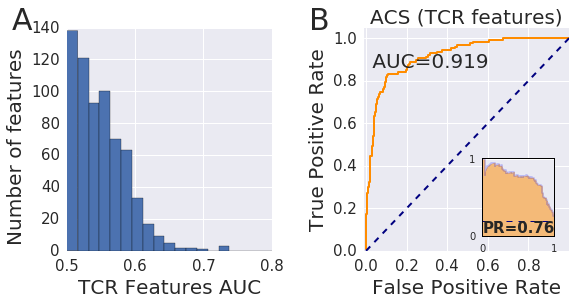

In [10]:
# k_list=[10,20,50,100,200]
k_list=[200]
# featureSelectionMethod='usingModel'
featureSelectionMethod=None

X=X_corrected.copy()
Xname='X_withRels_AgeGenderGFRCorrected'

Y=targetDF.iloc[:,0]
n_splits=10
group_kfold = StratifiedKFold(n_splits=n_splits)
groups = None
# featureSelectionMethod='usingModel'
# k=100
model=XGBClassifier
model_params={'learning_rate': 0.01, 'n_estimators': 500,'max_depth': 10,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3,'reg_lambda' : 10}

for k in k_list:
#     for featureSelectionMethod in featureSelectionMethod_list:

        y_pred_df = pd.DataFrame(index=Y.index, columns=['pred_proba'])
        i = 0
        selected_features_list=[]
        for train_index, val_index in group_kfold.split(X, Y, groups):
            print i
            i += 1
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = Y.loc[X_train.index], Y.loc[X_val.index]

            print 'fraction of 1s in train set=%s' % (float(y_train.sum()) / len(y_train))
            print 'fraction of 1s in test set=%s' % (float(y_val.sum()) / len(y_val))

            if (featureSelectionMethod is not None)&(featureSelectionMethod !='usingModel'):
                if k is None:
                    k = 50  
                if len(X_train.columns) < k:
                #                         k = len(X_train.columns)
                    featureSelectionMethod=None
                    print 'k is bigger than the number of columns, therefore no column was filtered by univariate'
                    selected_features=X_train.columns.values.tolist()
                    print selected_features
                else:
                    print 'filtering by %s with k=%s' % (featureSelectionMethod, k)
                    if featureSelectionMethod=='random':
                        import random
                        idxs_selected=random.sample(X_train.columns.values.tolist(), k)
                        X_train_new = X_train.loc[:, idxs_selected]
                        X_val_new=X_val.loc[:, idxs_selected]
                #                             uniName='random'
                    else:
                        selector = SelectKBest(featureSelectionMethod, k)
                        selector.fit(X_train, y_train)
                        idxs_selected = selector.get_support(indices=True)
                        # Create new dataframe with only desired columns, or overwrite existing
                        X_train_new = X_train.iloc[:, idxs_selected]
                        X_val_new=X_val.iloc[:, idxs_selected]
                #                             uniName = '%s' % filterFeaturesByUnivariate
                #                             uniName = uniName.split(' ')[1]
                #                             for ch in ['<', '>', '.']:
                #                                 uniName = uniName.replace(ch, '')
                    X_train = X_train_new
                    X_val = X_val_new
                    print 'k=%s' %k
                    print 'length of idxs_selected=%s' %len(idxs_selected)
                    print 'X_train shape after univaraite/random feature selection is  %s_%s' % (X_train.shape[0], X_train.shape[1])
                    print 'X_val shape after univaraite/random feature selection is  %s_%s' % (X_val.shape[0], X_val.shape[1])
                    print 'selected columns are:'
                    selected_features=X_train.columns.values.tolist()
                    print selected_features
                #                         XName = '%s_fUni%s%s' % (XName, uniName, k)


            # creating the model object
            m = model(**model_params)

            # fitting the training
            #                 if modelName == 'LGBMClassifier':
            #                     m.fit(X_train, y_train,
            # #                             eval_set=[(X_val, y_val)],
            #                             early_stopping_rounds=None, verbose=-1)
            #                 else:
            m.fit(X_train, y_train)

            if featureSelectionMethod=='usingModel':

                features=X_train.columns.tolist()
                importances=m.feature_importances_

                #                     #plot feature importances:
                #                     plt.subplots(figsize=(40,6))
                #                     plt.bar(range(len(features)),importances)
                #                     plt.xticks ([x+0.4 for x in range(len(features))],features,fontsize=7,rotation=45)
                #                     plt.title('Feature importance')
                #                     plt.show()

                #take only important fefatures:
                indices = (np.argsort(importances)[::-1])[:k]
                X_train_new=X_train.iloc[:,indices]
                X_val_new=X_val.iloc[:,indices]

                selected_features=X_train_new.columns.tolist()
                print 'selected features are:'
                print selected_features

                #fit model again, now using only selected features:
                m2 = model(**model_params)

                # fitting the training
                #                     if modelName == 'LGBMClassifier':
                #                         m2.fit(X_train_new, y_train,
                #     #                             eval_set=[(X_val, y_val)],
                #                                 early_stopping_rounds=None, verbose=-1)
                #                     else:
                m2.fit(X_train_new, y_train)

                print 'X_train shape after feature selection using model is  %s_%s' % (X_train_new.shape[0], X_train_new.shape[1])
                print 'X_val shape after feature selection using model is  %s_%s' % (X_val_new.shape[0], X_val_new.shape[1])


                # getting the predictions for the test using m2 (trained on select feature only!), X_train_new
                #and X_val_new
                y_pred_proba = m2.predict_proba(X_val_new)
                y_pred_df.loc[y_val.index, :] = np.expand_dims(y_pred_proba[:, 1], 1)
                numFeaturesPerSplit=len(X_train_new.columns)

            else:
                # getting the predictions for the test using m1 (trained on all features or features pre-selected
                #before applying the model:
                y_pred_proba = m.predict_proba(X_val)
                y_pred_df.loc[y_val.index, :] = np.expand_dims(y_pred_proba[:, 1], 1)
                numFeaturesPerSplit=len(X_train.columns)

            #appending list of selected features:
            try:
                selected_features_list=selected_features_list+selected_features
            except:
                print 'no features were selected'
        
        print 'done CV'
        print y_pred_df.head()
        print y_pred_df.shape

        print 'plotting:...'

        fig=plot_grant_figure_TCR(feature_auc_df,Y,y_pred_df)
        figureFolder='%s/Presentations and Manuscripts/ISF_grant_figure/' %MyPath
        fig.savefig(figureFolder + 'TCRfeature_grantFig_' + Xname + str(k)+'_'+str(featureSelectionMethod)+'.png',bbox_inches='tight')